# Job Title Classification By Industry

#### loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#### reading the dataset

In [2]:
data = pd.read_csv("Job titles and industries.csv")

#### data exploration

In [3]:
data.head()

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 entries, 0 to 8585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job title  8586 non-null   object
 1   industry   8586 non-null   object
dtypes: object(2)
memory usage: 134.3+ KB


In [5]:
data.describe()

,job title,industry
count,8586,8586
unique,3890,4
top,marketing executive,IT
freq,91,4746


we have only 2 cols, both are textual , we have no nulls to worry about , but we still need to deal with text data

In [6]:
data.duplicated().sum()

4618

about half of the data is duplicates , we need to remove them

#### explore the label 

In [7]:
industry = data['industry']

In [8]:
industry.value_counts(normalize=True)

IT             0.552760
Marketing      0.236548
Education      0.167133
Accountancy    0.043559
Name: industry, dtype: float64

#### there is class impalance here , Accountancy is represented with less than 1% in data

#### Data Visualization

In [9]:
def hist_pie(df,target):
    fig, ax=plt.subplots(1,2,figsize=(15,6))
    _ = sns.histplot(x=target, data=df, ax=ax[0],bins=4,hue=target,)
    _ = df[target].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

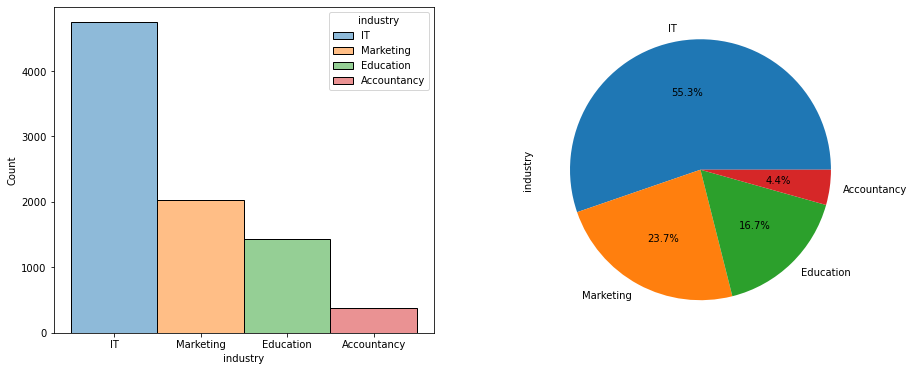

In [10]:
hist_pie(data,'industry')

### Data Preprocessing

since machine learning models accepts only numbers , we need to deal with "job title" column

In [11]:
# remove duplicates
data = data.drop_duplicates()

In [12]:
job_title = [a for a in data['job title'].values] 

In [13]:
job_title

['technical support and helpdesk supervisor - county buildings, ayr soa04086',
 'senior technical support engineer',
 'head of it services',
 'js front end engineer',
 'network and telephony controller',
 'privileged access management expert',
 'devops engineers x 3 - global brand',
 'data modeller',
 'php web developer £45,000 based in london',
 'solution / technical architect - ethical brand',
 'lead developer - ethical brand',
 'junior front-end developer',
 'vb .net web developer, milton keynes, £45k',
 'data scientist, newcastle, up to £40k',
 'senior bi engineer',
 'machine learning engineer',
 'full stack developer, oxfordshire, £40k',
 'c# software developer, waltham cross, £55k',
 'senior data engineer',
 'erp support analyst - unit4, agresso business world',
 'application support analyst - cheshire - financial services',
 'accountancy software trainer - manchester - remote working',
 'business analyst',
 'delivery lead',
 'devops engineer x 2 temp - county buildings, ayr soa0

In [14]:
job_title_length = [len(a.split(' ')) for a in data['job title'].values] 

In [15]:
max(job_title_length), min(job_title_length), np.mean(job_title_length), np.std(job_title_length)

(20, 1, 4.574344758064516, 2.4091385728927968)

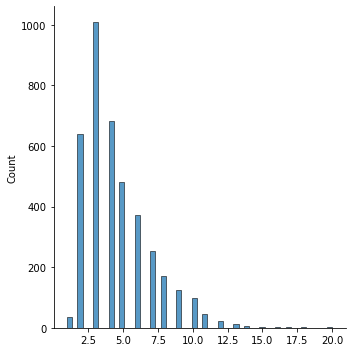

In [16]:
sns.displot(job_title_length)

little bit tricky since there is special characters , punctuation and othre stuff we need to deal with

###### generating wordcloud for the titles

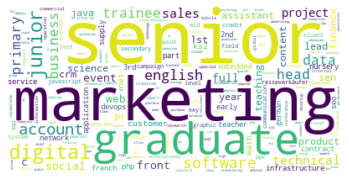

In [17]:
from wordcloud import WordCloud
text = " ".join(cat.split()[0] for cat in data['job title'])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###### word count for each word in job titles

In [18]:
data['job title'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).sort_values(ascending=False)

-                   1229.0
manager              487.0
marketing            461.0
developer            390.0
engineer             369.0
                     ...  
opportunity!           1.0
pupils                 1.0
immediately            1.0
restaurants            1.0
(arabic/english)       1.0
Length: 2711, dtype: float64

 '-' is the top repeated word !! ,  we need to clean job titles first before converting it to separate features

In [20]:

import re
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()

def clean_text(df):
    title_descriptions = []
    for i in range(len(df)):
        title_description = str(df.iloc[i,0])
#         print(title_description)
        
        # Remove all the special characters
        title_description = re.sub(r'\W', ' ', str(df.iloc[i,0]))

        # remove all single characters
        title_description = re.sub(r'\s+[a-zA-Z]\s+', ' ', title_description)

        # Remove single characters from the start ; eg : a 
        title_description = re.sub(r'\^[a-zA-Z]\s+', ' ', title_description) 

        # Substituting multiple spaces with single space
        title_description = re.sub(r'\s+', ' ', title_description, flags=re.I)

        # Converting to Lowercase
        title_description = title_description.lower()

        # Lemmatization , to send words back to its root
        title_description = title_description.split()

        title_description = [stemmer.lemmatize(word) for word in title_description]
        title_description = ' '.join(title_description)

        title_descriptions.append(title_description)
    return title_descriptions

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\20100\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
job_titles = clean_text(data)

In [22]:
data['job title'] = job_titles

In [23]:
#import necessarry libraries

from sklearn.feature_extraction.text import CountVectorizer,FeatureHasher ,HashingVectorizer, TfidfVectorizer
import nltk
# nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

use the bag of words model to convert text documents into corresponding numerical features, use TFIDF to measue word frequency among all job decriptions

In [24]:
vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(job_titles).toarray()

In [25]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
X.shape

(3968, 466)

we have only distinct 466 after removing the stopwords

out data is a sparse data , there is many techniques to handle this ( we will visit FeatureHasher later)

# Data Modeling

### Unsupervised learning 

kmeans clustering

In [27]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(X)
km.labels_


array([0, 3, 0, ..., 2, 1, 0])

In [30]:
pd.crosstab(data['industry'],km.labels_)

col_0,0,1,2,3
industry,,,,
Accountancy,175,66,21,1
Education,719,218,32,4
IT,990,31,125,383
Marketing,441,432,324,6


there is heavy overlapping for IT and marketing classes with other classes

T-SNE

In [31]:
X.shape

(3968, 466)

In [35]:
from sklearn.manifold import TSNE

t = TSNE(n_components=2,learning_rate=100)
X_new = t.fit_transform(X)

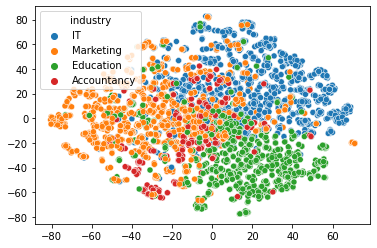

In [38]:
sns.scatterplot(x=X_new[:,0],y=X_new[:,1],hue=y)
plt.show()

there is a little bit overlap, specially for Accountancy jobs, they're not distinguishable easily like other titles 

### split for testing

we will use kfold validation to get more confident about out local score

In [39]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [40]:
X,y = X,data['industry']


models = [MultinomialNB(),RandomForestClassifier(),SVC(),GradientBoostingClassifier(),LogisticRegression()]
# models = [MultinomialNB()]

results = []
kf = KFold(n_splits=5,random_state=1,shuffle=True)
for model in models:
    print(model)
    i=1
    for train_index, test_index in kf.split(X,y):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #             sm = BorderlineSMOTE()
    #             X_train, y_train = sm.fit_resample(X_train, y_train)
                model.fit(X_train,y_train)
                preds_test = model.predict(X_test)
                preds_train = model.predict(X_train)        
                preds_test = model.predict(X_test)
                print("fold {}  train accuracy is {}".format(i,accuracy_score(y_train,preds_train)))
                print("fold {}  test accuracy is {}".format(i,accuracy_score(y_test,preds_test)))
#                 results.append([model,i ,accuracy_score(y_train,preds_train), accuracy_score(y_test,preds_test)])

                i+=1
#                 cm = confusion_matrix(y_test,preds_test)
#                 ConfusionMatrixDisplay(cm).plot()
#                 plt.xticks(rotation=90)
#                 plt.show()  
    print("=============")



MultinomialNB()
fold 1  train accuracy is 0.8805923125393825
fold 1  test accuracy is 0.8564231738035264
fold 2  train accuracy is 0.8815374921235035
fold 2  test accuracy is 0.8602015113350125
fold 3  train accuracy is 0.8746061751732829
fold 3  test accuracy is 0.8740554156171285
fold 4  train accuracy is 0.8790551181102362
fold 4  test accuracy is 0.8511979823455234
fold 5  train accuracy is 0.8768503937007874
fold 5  test accuracy is 0.8713745271122321
RandomForestClassifier()
fold 1  train accuracy is 0.9612476370510397
fold 1  test accuracy is 0.8513853904282116
fold 2  train accuracy is 0.9606175173282924
fold 2  test accuracy is 0.8463476070528967
fold 3  train accuracy is 0.962822936357908
fold 3  test accuracy is 0.8513853904282116
fold 4  train accuracy is 0.9596850393700788
fold 4  test accuracy is 0.8486759142496847
fold 5  train accuracy is 0.9625196850393701
fold 5  test accuracy is 0.8398486759142497
SVC()
fold 1  train accuracy is 0.9319470699432892
fold 1  test accura

lets try the same but try to balance classes

In [41]:
from imblearn.over_sampling import SMOTE

X,y = X,data['industry']


models = [MultinomialNB(),RandomForestClassifier(),SVC(),GradientBoostingClassifier(),LogisticRegression()]
# models = [MultinomialNB()]

results = []
kf = KFold(n_splits=5,random_state=1,shuffle=True)
for model in models:
    print(model)
    i=1
    for train_index, test_index in kf.split(X,y):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                sm = SMOTE()
                X_train, y_train = sm.fit_resample(X_train, y_train)
                model.fit(X_train,y_train)
                preds_test = model.predict(X_test)
                preds_train = model.predict(X_train)        
                preds_test = model.predict(X_test)
                print("fold {}  train accuracy is {}".format(i,accuracy_score(y_train,preds_train)))
                print("fold {}  test accuracy is {}".format(i,accuracy_score(y_test,preds_test)))
#                 results.append([model,i ,accuracy_score(y_train,preds_train), accuracy_score(y_test,preds_test)])

                i+=1
#                 cm = confusion_matrix(y_test,preds_test)
#                 ConfusionMatrixDisplay(cm).plot()
#                 plt.xticks(rotation=90)
#                 plt.show()  
    print("=============")


MultinomialNB()
fold 1  train accuracy is 0.8870033112582781
fold 1  test accuracy is 0.8476070528967254
fold 2  train accuracy is 0.897493837304848
fold 2  test accuracy is 0.8501259445843828
fold 3  train accuracy is 0.8940677966101694
fold 3  test accuracy is 0.8652392947103275
fold 4  train accuracy is 0.8954102355808286
fold 4  test accuracy is 0.8587641866330391
fold 5  train accuracy is 0.8998771498771498
fold 5  test accuracy is 0.8587641866330391
RandomForestClassifier()
fold 1  train accuracy is 0.9735099337748344
fold 1  test accuracy is 0.8476070528967254
fold 2  train accuracy is 0.9722678718159409
fold 2  test accuracy is 0.8413098236775819
fold 3  train accuracy is 0.9745762711864406
fold 3  test accuracy is 0.845088161209068
fold 4  train accuracy is 0.9713647441104792
fold 4  test accuracy is 0.8587641866330391
fold 5  train accuracy is 0.9748157248157249
fold 5  test accuracy is 0.8297604035308953
SVC()
fold 1  train accuracy is 0.9432947019867549
fold 1  test accurac

#### from above results we can conclude that SVM with no oversampling is the best classifier

#### tuning SVC classifier parameters

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


param_grid = {'C':[1,10,100,1000],'gamma':[10,1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42,stratify=y)
grid = GridSearchCV(SVC(probability=True),param_grid,refit = True, verbose=2,n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  9.1min finished


GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [52]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [53]:
preds = grid.predict(X_test)

In [54]:
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

 Accountancy       0.91      0.86      0.88        79
   Education       0.96      0.89      0.92       292
          IT       0.94      0.97      0.95       459
   Marketing       0.90      0.93      0.92       361

    accuracy                           0.93      1191
   macro avg       0.93      0.91      0.92      1191
weighted avg       0.93      0.93      0.93      1191

[[ 68   4   4   3]
 [  2 260   9  21]
 [  0   4 443  12]
 [  5   4  15 337]]


# Saving best model to use in REST-API

In [55]:
best_model = grid.best_estimator_

In [56]:
best_model.fit(X,y)

SVC(C=1, gamma=1, probability=True)

In [57]:
import pickle

model_filename = "Pickle_SVM_Model.pkl"  
vectorizer_filename = 'Pickle_vectorizer.pkl'

with open(model_filename, 'wb') as file:  
    pickle.dump(best_model, file)

with open(vectorizer_filename, 'wb') as file:  
    pickle.dump(vectorizer, file)


testing model

In [58]:
with open(model_filename, 'rb') as file:  
    m = pickle.load(file)

m

SVC(C=1, gamma=1, probability=True)

In [59]:
with open(vectorizer_filename, 'rb') as file:  
    v = pickle.load(file)

v

TfidfVectorizer(max_df=0.7, max_features=1000, min_df=5,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

sample data

In [60]:
job_describtion_sample = ["IT Persion required"]

In [61]:
sample = v.transform(job_describtion_sample).toarray()

In [62]:
sample

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [63]:
m.predict(sample)

array(['Education'], dtype=object)

In [64]:
m.predict_proba(sample)

array([[0.05097761, 0.48869015, 0.26697093, 0.1933613 ]])

Not that accurate but it works  😄

# Calling the API 

In [68]:
import requests 
import json
END_POINT = 'https://msaid-jobclassification.herokuapp.com/api/v1/predict/'

In [69]:
def predict(text):
    endpoint = END_POINT+requests.utils.quote(text)
    try:
        r = requests.get(endpoint,timeout=3)
        r.raise_for_status()
        return json.loads(r.text)['prediction']
    except requests.exceptions.HTTPError as errh:
        print ("Http Error:",errh)
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc)
    except requests.exceptions.Timeout as errt:
        print ("Timeout Error:",errt)
    except requests.exceptions.RequestException as err:
        print ("OOps: Something Else",err)
        
    

In [70]:
predict("java developer")

'IT'

In [71]:
predict("science teacher")

'Education'

In [72]:
predict("tax accounting")

'Accountancy'

In [73]:
predict("social media")

'Marketing'

In [269]:
data[data.duplicated()][:200]

,job title,industry
7,devops engineer 3 global brand,IT
10,devops engineer 3 global brand,IT
11,devops engineer 3 global brand,IT
26,business analyst,IT
36,net developer,IT
...,...,...
471,trainee network technician,IT
472,trainee network technician,IT
473,trainee network technician,IT
474,senior java developer,IT


In [265]:
data.shape

(8586, 2)